# Simple multilayer perceptron trained for CIFAR classification
- Fetching, preprocessing and inspecting data
- Creating model
- Compiling model
- Training
- Testing
- Showing results

## Fetching data and analysing it

Using CIFAR10 a set of (32,32) images with 10 classes. Converting labels to the one-hot encoding in the (10, 1) vector and normalizing images.

Showing labels' shape and some random training data images.

170498071/170498071 ━━━━━━━━━━━━━━━━━━━━ 14s 0us/step
(50000, 10)
(10000, 10)


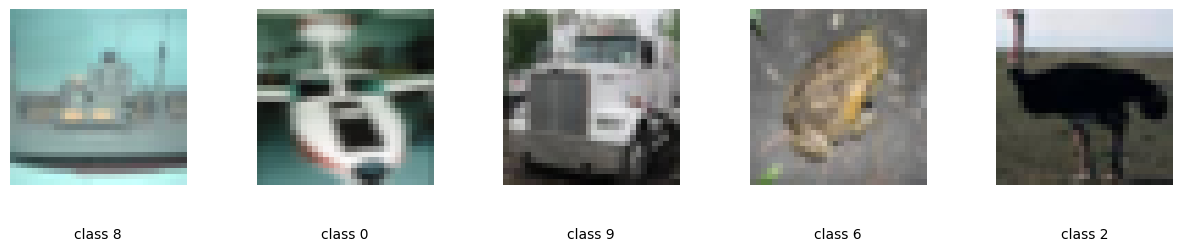

In [ ]:
import numpy as np
from keras import datasets, utils
import matplotlib.pyplot as plt

SAMPLES_TO_SHOW = 5
NUM_CLASSES = 10

(x_train, y_train), (x_test, y_test) = datasets.cifar10.load_data()

x_train = x_train.astype('float32') / 255.0
x_test = x_test.astype('float32') / 255.0

y_train = utils.to_categorical(y_train, NUM_CLASSES)
y_test = utils.to_categorical(y_test, NUM_CLASSES)

print(y_train.shape)
print(y_test.shape)

sample_indices = np.random.choice(range(len(x_train)), SAMPLES_TO_SHOW)

fig = plt.figure(figsize=(15, 3))
fig.subplots_adjust(hspace=0.4, wspace=0.4)

for i, idx in enumerate(sample_indices):
  _img = x_train[idx]
  ax = fig.add_subplot(1, SAMPLES_TO_SHOW, i+1)
  ax.axis('off')
  ax.text(0.5, -0.3, 'class {}'.format(np.argmax(y_train[idx])), fontsize=10, ha='center', transform=ax.transAxes)
  ax.imshow(_img)

plt.show()

## Creating the model

Using Flatten input layer and 2 Dense layers with ReLU ativation. The output layer uses softmax.


In [ ]:
from keras import layers, models

input_layer = layers.Input(shape=(32, 32, 3))
x = layers.Flatten()(input_layer)
x = layers.Dense(units=256, activation='relu')(x)
x = layers.Dense(units=128, activation='relu')(x)
output_layer = layers.Dense(units=NUM_CLASSES, activation='softmax')(x)
model = models.Model(input_layer, output_layer)

print(model.summary())

Model: "functional"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer (InputLayer)        │ (None, 32, 32, 3)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 3072)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 256)            │       786,688 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 128)            │        32,896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 10)             │         1,290 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 820,874 (3.13 MB)

 Trainable params: 820,874 (3.13 MB)

 Non-trainable params: 0 (0.00 B)

None


## Compiling and training the model

In [ ]:
from keras import optimizers

opt = optimizers.Adam(learning_rate=0.0008)
model.compile(loss='categorical_crossentropy', optimizer=opt, metrics=['accuracy'])

model.fit(x_train, y_train, batch_size=32, epochs=15, shuffle=True)

Epoch 1/15
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 7s 3ms/step - accuracy: 0.2832 - loss: 1.9809
Epoch 2/15
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.3963 - loss: 1.6876
Epoch 3/15
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.4257 - loss: 1.6012
Epoch 4/15
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.4455 - loss: 1.5492
Epoch 5/15
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.4676 - loss: 1.4980
Epoch 6/15
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.4780 - loss: 1.4625
Epoch 7/15
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.4803 - loss: 1.4522
Epoch 8/15
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.4985 - loss: 1.4127
Epoch 9/15
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.4983 - loss: 1.4107
Epoch 10/15
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.5056 - loss: 1.3883
Epoch 11/15
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.5149 - loss: 1.3690
Epoch 12/15
1563/1563 ━━━━━━━━

## Analysing the results

313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step


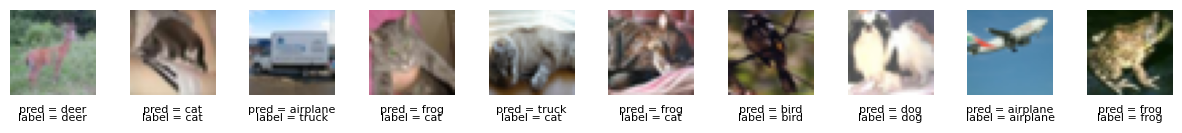

In [ ]:
CLASSES = np.array(['airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck'])

preds = model.predict(x_test)
preds_single_cls = CLASSES[np.argmax(preds, axis = -1)]
labels_single_cls = CLASSES[np.argmax(y_test, axis = -1)]

RESULTS_TO_SHOW = 10
res_indexes = np.random.choice(range(len(x_test)), RESULTS_TO_SHOW)

res_fig = plt.figure(figsize=(15, 3))
res_fig.subplots_adjust(hspace=0.4, wspace=0.4)

for i, idx in enumerate(res_indexes):
  img = x_test[idx]
  ax = res_fig.add_subplot(1, RESULTS_TO_SHOW, i+1)
  ax.axis('off')
  ax.text(0.5, -0.2, 'pred = {}'.format(preds_single_cls[idx]), fontsize=8, ha='center', transform=ax.transAxes)
  ax.text(0.5, -0.3, 'label = {}'.format(labels_single_cls[idx]), fontsize=8, ha='center', transform=ax.transAxes)
  ax.imshow(img)